In [84]:
import os
os.system('./autorun.sh')

1

In [85]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)
pd.set_option('display.precision', 2)

In [89]:
df = pd.read_csv('C:/Users/Инна/Desktop/otus/Sample - Superstore.csv', encoding='Windows-1252')

In [90]:
df.to_csv('./inna.csv')

Задача: 
сделать прогноз прибыли
предсказать прибыль меняя пар-ры - кол-во проданной продукции, долю определенного сегмента
(Предсказать размер прибыли для определенных транзакций, товаров, регионов и т.д.
проверить гипотезу о том какой регион прибыльнее, определить наиболее прибыльную категорию товаров, предсказать прибыль в разрезе регион/категория)
Таргет: Столбец Profit.
Признаки: 
Тип задачи: Регрессия.

In [91]:
df.shape

(9994, 21)


обработать пропуски


In [92]:
pd.set_option('display.precision', 2)

In [87]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91,November,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58,November,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.87,June,2016


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [93]:
for col in df.columns:
    if not 'no' in col and not 'ID' in col:
        un_n = df[col].nunique()
        print(f'no of unique {col}: {un_n}')

no of unique Order Date: 1237
no of unique Ship Date: 1334
no of unique Ship Mode: 4
no of unique Customer Name: 793
no of unique Segment: 3
no of unique Country: 1
no of unique City: 531
no of unique State: 49
no of unique Postal Code: 631
no of unique Region: 4
no of unique Category: 3
no of unique Sub-Category: 17
no of unique Product Name: 1850
no of unique Sales: 5825
no of unique Quantity: 14
no of unique Discount: 12
no of unique Profit: 7287


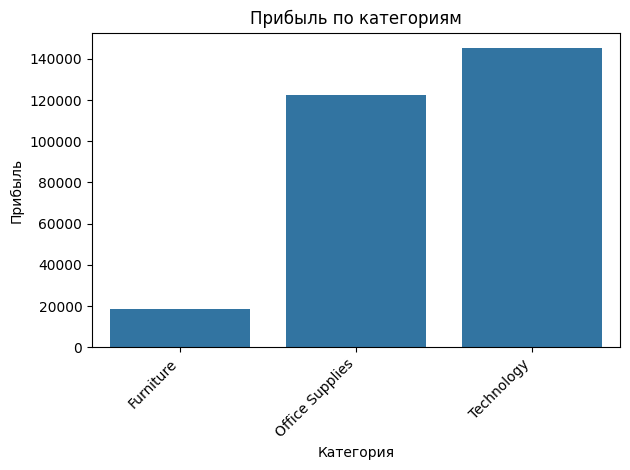

In [69]:
# Группировка по категориям и вычисление общей прибыли
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category)

plt.title('Прибыль по категориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

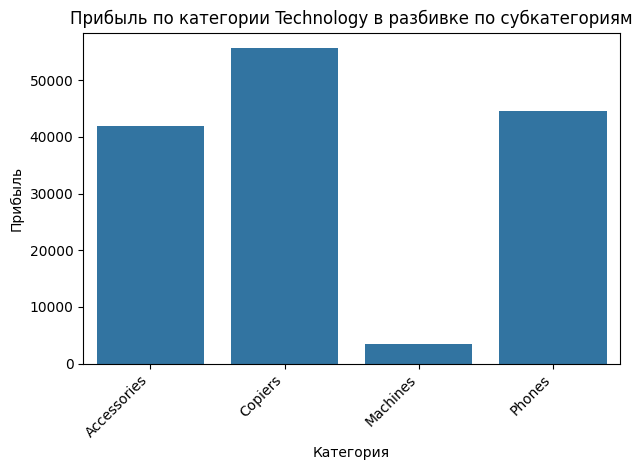

In [42]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Category'] == 'Technology'] # Фильтруем строки, относящиеся к категории "Technology"
profit_by_subcategory_technology = technology_df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по категории Technology в разбивке по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

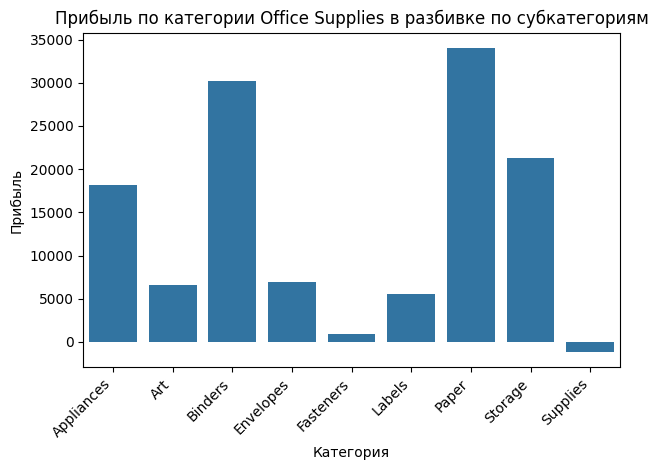

In [43]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Category'] == 'Office Supplies'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = technology_df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по категории Office Supplies в разбивке по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

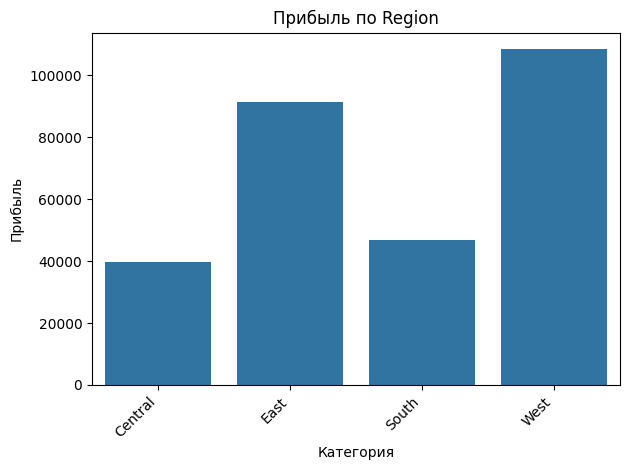

In [44]:
# Группировка по категориям и вычисление общей прибыли
# technology_df = df['Region'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Region')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по Region')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()

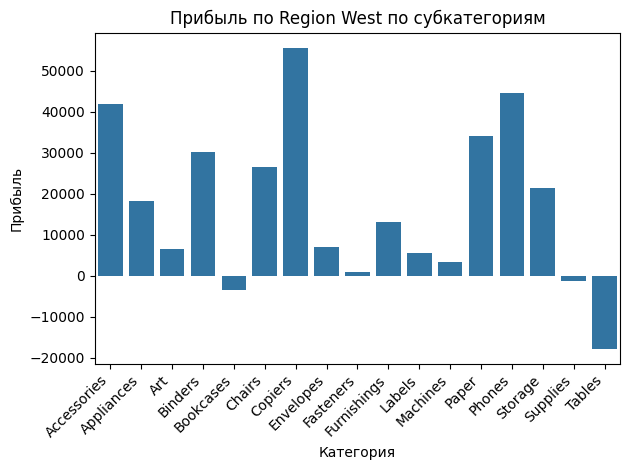

In [45]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Region'] == 'West'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title('Прибыль по Region West по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()
#наблюдаем убыток по столам и прибыль по копирам

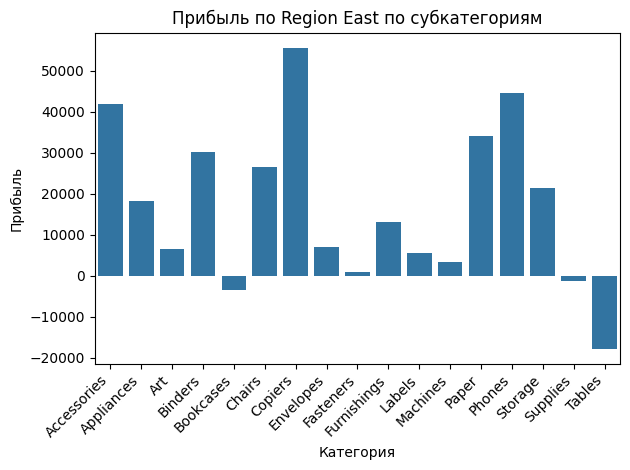

In [46]:
# Группировка по категориям и вычисление общей прибыли
technology_df = df[df['Region'] == 'East'] # Фильтруем строки, относящиеся к категории "Office Supplies"
profit_by_subcategory_technology = df.groupby('Sub-Category')['Profit'].sum().reset_index()  # Groupby выполняем по отфильтрованным данным

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory_technology)

plt.title(f'Прибыль по Region East по субкатегориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()
#наблюдаем убыток по столам и прибыль по копирам, телефонам, аксессуарам

In [94]:
# Преобразование столбца 'Order Date' в формат datetime
import pandas as pd
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
except ValueError:
    print("Ошибка: не удалось преобразовать 'Order Date' в формат даты.  Проверьте формат данных в столбце.")
    exit()

df['Order Date'].head(3)

0   2016-11-08
1   2016-11-08
2   2016-06-12
Name: Order Date, dtype: datetime64[ns]

In [95]:
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Year'].head(3)

0    2016
1    2016
2    2016
Name: Year, dtype: int32

In [96]:
profit_by_month = df.groupby('Month')['Profit'].sum().reset_index()
profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()
profit_by_year.head(3)

,Year,Profit
0,2014,49543.97
1,2015,61618.60
2,2016,81795.17


In [97]:
# Сортировка месяцев (важно для корректного отображения графика)
#  Если используется month_name(), нужно сортировать по порядку месяцев:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_by_month['Month'] = pd.Categorical(profit_by_month['Month'], categories=month_order, ordered=True)
profit_by_month = profit_by_month.sort_values('Month')
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
profit_by_month.head(3)

,Month,Profit
4,January,9134.45
3,February,10294.61
7,March,28594.69


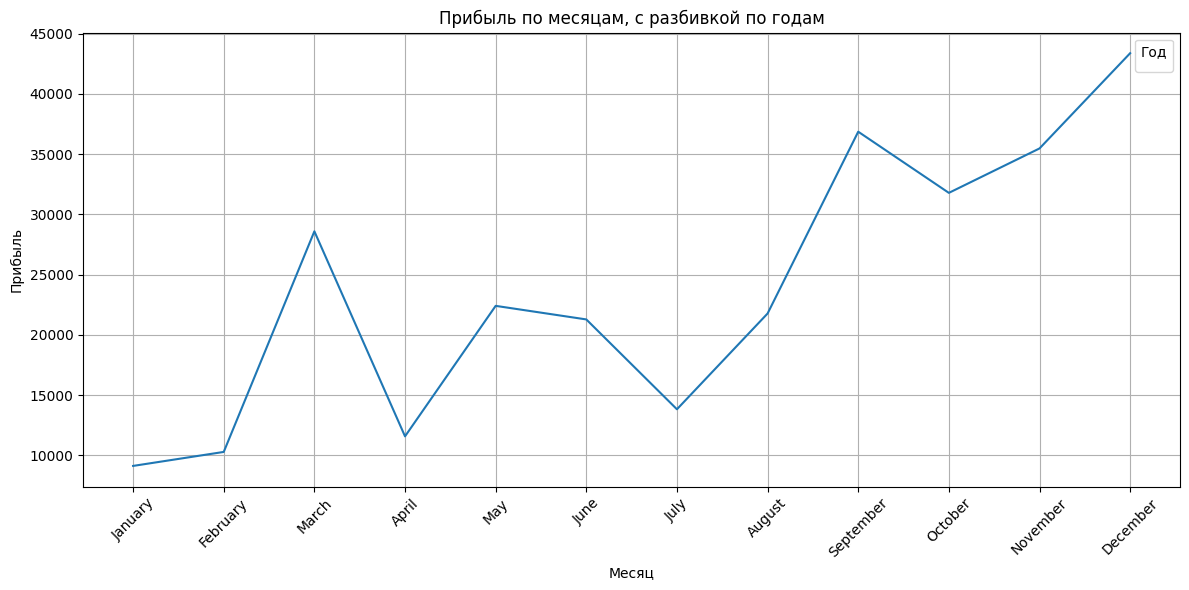

In [98]:
# Построение графика
plt.figure(figsize=(12, 6)) # Увеличение размера графика для лучшей читаемости
sns.lineplot(x='Month', y='Profit', data=df,errorbar=None, estimator='sum') # График с линией и маркерами

plt.title('Прибыль по месяцам, с разбивкой по годам')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Год')  # Добавляем заголовок к легенде
plt.show()

In [99]:
print(df['Profit'].describe())

count    9994.00
mean       28.66
std       234.26
min     -6599.98
25%         1.73
50%         8.67
75%        29.36
max      8399.98
Name: Profit, dtype: float64


In [76]:
df.isna().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
Month            False
Year             False
dtype: bool

In [77]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.00,9994,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,2016-04-30 00:07:12.259355648,55190.38,229.86,3.79,0.16,28.66,2015.72
min,1.00,2014-01-03 00:00:00,1040.00,0.44,1.00,0.00,-6599.98,2014.00
25%,2499.25,2015-05-23 00:00:00,23223.00,17.28,2.00,0.00,1.73,2015.00
50%,4997.50,2016-06-26 00:00:00,56430.50,54.49,3.00,0.20,8.67,2016.00
75%,7495.75,2017-05-14 00:00:00,90008.00,209.94,5.00,0.20,29.36,2017.00
max,9994.00,2017-12-30 00:00:00,99301.00,22638.48,14.00,0.80,8399.98,2017.00
std,2885.16,NaN,32063.69,623.25,2.23,0.21,234.26,1.12


In [78]:
df.groupby('Category')['Profit'].mean()

Category
Furniture           8.70
Office Supplies    20.33
Technology         78.75
Name: Profit, dtype: float64

In [100]:
#удалим ненужные данные

# Список столбцов для удаления (добавьте все нужные)
columns_to_drop = [col for col in df.columns 
                  if 'ID' in col
                   or 'Date' in col
                   or 'id' in col
                   or 'Postal Code' in col
                   or 'Customer Name' in col
                   or 'Country' in col
                   or 'City' in col
                   or 'Product Name' in col
                   or 'State' in col]

# Удаляем выбранные столбцы
df_filtered = df.drop(columns=columns_to_drop)

print(f'''
Удалены столбцы:
{columns_to_drop}
''')
print(f'''
Оставшиеся столбцы:
{df_filtered.columns.tolist()}
''')


Удалены столбцы:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name']


Оставшиеся столбцы:
['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month', 'Year']



In [101]:
df_filtered[df_filtered['Profit'] <= 20] #сделать гистогр по каким товарам низк приб

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
2,Second Class,Corporate,West,Office Supplies,Labels,14.62,2,0.00,6.87,June,2016
3,Standard Class,Consumer,South,Furniture,Tables,957.58,5,0.45,-383.03,October,2015
4,Standard Class,Consumer,South,Office Supplies,Storage,22.37,2,0.20,2.52,October,2015
5,Standard Class,Consumer,West,Furniture,Furnishings,48.86,7,0.00,14.17,June,2014
6,Standard Class,Consumer,West,Office Supplies,Art,7.28,4,0.00,1.97,June,2014
...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,West,Technology,Accessories,36.24,1,0.00,15.22,September,2016
9989,Second Class,Consumer,South,Furniture,Furnishings,25.25,3,0.20,4.10,January,2014
9990,Standard Class,Consumer,West,Furniture,Furnishings,91.96,2,0.00,15.63,February,2017
9991,Standard Class,Consumer,West,Technology,Phones,258.58,2,0.20,19.39,February,2017


In [102]:
df_filtered[df_filtered['Profit'] >= 3000] #сделать гистогр по каким товарам низк приб

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month,Year
509,Standard Class,Consumer,South,Office Supplies,Binders,6354.95,5,0.0,3177.47,March,2015
2623,First Class,Home Office,East,Technology,Copiers,11199.97,4,0.2,3919.99,October,2017
4098,Standard Class,Consumer,Central,Office Supplies,Binders,9449.95,5,0.0,4630.48,September,2014
4190,Standard Class,Consumer,East,Technology,Copiers,10499.97,3,0.0,5039.99,November,2017
6826,Standard Class,Corporate,Central,Technology,Copiers,17499.95,5,0.0,8399.98,October,2016
8153,First Class,Consumer,West,Technology,Copiers,13999.96,4,0.0,6719.98,March,2017
9039,Standard Class,Consumer,Central,Office Supplies,Binders,9892.74,13,0.0,4946.37,December,2016


выявить по какой сегмент товаров принес большую часть приб
какой город принес больше приб
цель выявить неявные зависимости - гипотеза: в январе больше всего покупают технику - в какой сезон какая категория товаров приносит больше прибыли(построить гистограмму - столбцы- это виды товаров)
Поэтому необходимо преобразовать “Товар” в числовой формат и исп.Label Encoding далее ищем зависимость как в обычной линейной регрессии

In [103]:
df[df['Product Name'].isin(['Canon imageCLASS 2200 Advanced Copier'])].head(3)#самый дорог товар????

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
2623,2624,CA-2017-127180,2017-10-22,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,3919.99,October,2017
4190,4191,CA-2017-166709,2017-11-17,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.99,November,2017
6425,6426,CA-2016-143714,2016-05-23,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.98,4,0.4,1120.00,May,2016


In [106]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

NameError: name 'x' is not defined

<Figure size 1000x600 with 0 Axes>

In [427]:
df_filtered.sort_values(['Profit'], ascending=(False)).head(5) #cортировка по убыванию приб.

,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
6826,Standard Class,Corporate,Central,Technology,Copiers,5,0.0,8399.98,October,2016
8153,First Class,Consumer,West,Technology,Copiers,4,0.0,6719.98,March,2017
4190,Standard Class,Consumer,East,Technology,Copiers,3,0.0,5039.99,November,2017
9039,Standard Class,Consumer,Central,Office Supplies,Binders,13,0.0,4946.37,December,2016
4098,Standard Class,Consumer,Central,Office Supplies,Binders,5,0.0,4630.48,September,2014


In [428]:
df_filtered[df_filtered['Discount'] != 0].head(3)#самые большие скидки

,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
3,Standard Class,Consumer,South,Furniture,Tables,5,0.45,-383.03,October,2015
4,Standard Class,Consumer,South,Office Supplies,Storage,2,0.20,2.52,October,2015
7,Standard Class,Consumer,West,Technology,Phones,6,0.20,90.72,June,2014


<Axes: ylabel='Frequency'>

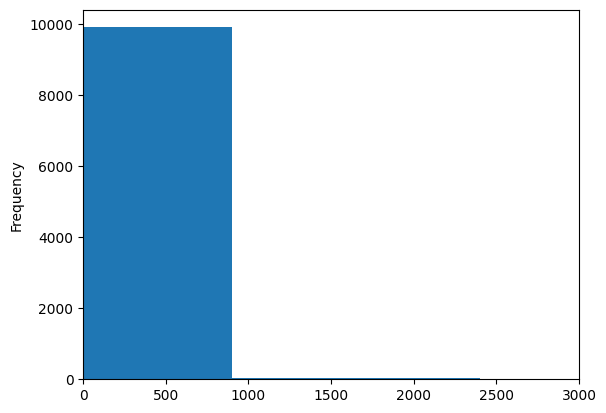

In [429]:
df['Profit'].plot(kind='hist', xlim = [0, 3000])

In [430]:
#преобразуем категориальные признаки
df_filtered['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [431]:
# df_filtered['Ship Mode'] = df['Ship Mode'].replace({'Same Day': 0, 'Second Class': 2,'First Class': 1, 'Standard Class': 3})
# # df['smoker'] = df['smoker'].astype(int)
# df_filtered['Ship Mode']


In [432]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ship Mode' column
df_filtered['Ship Mode'] = le.fit_transform(df_filtered['Ship Mode'])

# (Optional) Store the mapping between original values and encoded values
ship_mode_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nShip Mode Encoding Mapping:")
# ship_mode_mapping
df_filtered.head(3)


Ship Mode Encoding Mapping:


,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,Consumer,South,Furniture,Bookcases,2,0.0,41.91,November,2016
1,2,Consumer,South,Furniture,Chairs,3,0.0,219.58,November,2016
2,2,Corporate,West,Office Supplies,Labels,2,0.0,6.87,June,2016


In [433]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ship Mode' column
df_filtered['Segment'] = le.fit_transform(df_filtered['Segment'])

# (Optional) Store the mapping between original values and encoded values
segment_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nShip Mode Encoding Mapping:")
# segment_mapping
df_filtered.head(3)


Ship Mode Encoding Mapping:


,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,0,South,Furniture,Bookcases,2,0.0,41.91,November,2016
1,2,0,South,Furniture,Chairs,3,0.0,219.58,November,2016
2,2,1,West,Office Supplies,Labels,2,0.0,6.87,June,2016


In [434]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ship Mode' column
df_filtered['Category'] = le.fit_transform(df_filtered['Category'])

# (Optional) Store the mapping between original values and encoded values
сategory_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nShip Mode Encoding Mapping:")
# сategory_mapping
df_filtered.head(3)


Ship Mode Encoding Mapping:


,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,0,South,0,Bookcases,2,0.0,41.91,November,2016
1,2,0,South,0,Chairs,3,0.0,219.58,November,2016
2,2,1,West,1,Labels,2,0.0,6.87,June,2016


In [435]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ship Mode' column
df_filtered['Sub-Category'] = le.fit_transform(df_filtered['Sub-Category'])

# (Optional) Store the mapping between original values and encoded values
sub_Category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nShip Mode Encoding Mapping:")
# сategory_mapping
df_filtered.head(3)


Ship Mode Encoding Mapping:


,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,0,South,0,4,2,0.0,41.91,November,2016
1,2,0,South,0,5,3,0.0,219.58,November,2016
2,2,1,West,1,10,2,0.0,6.87,June,2016


In [436]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ship Mode' column
df_filtered['Region'] = le.fit_transform(df_filtered['Region'])

# (Optional) Store the mapping between original values and encoded values
region_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nShip Mode Encoding Mapping:")
# сategory_mapping
df_filtered.head(3)


Ship Mode Encoding Mapping:


,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,0,2,0,4,2,0.0,41.91,November,2016
1,2,0,2,0,5,3,0.0,219.58,November,2016
2,2,1,3,1,10,2,0.0,6.87,June,2016


In [437]:
df['Month'].unique()

['November', 'June', 'October', 'April', 'December', ..., 'July', 'September', 'January', 'March', 'February']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [438]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}  # Замените на ваши названия месяцев
df_filtered['Month'] = df_filtered['Month'].map(month_mapping)
df_filtered.head(3)

,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Month,Year
0,2,0,2,0,4,2,0.0,41.91,11,2016
1,2,0,2,0,5,3,0.0,219.58,11,2016
2,2,1,3,1,10,2,0.0,6.87,6,2016


In [439]:
corr = df_filtered.select_dtypes(include=['number']).corr(method='pearson')
corr

,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Profit,Year
Ship Mode,1.00e+00,-4.53e-03,-2.38e-02,-4.13e-03,-3.27e-03,2.24e-02,-4.36e-04,-6.62e-03,-4.06e-02
Segment,-4.53e-03,1.00e+00,-5.56e-03,1.01e-02,1.09e-02,8.13e-03,-1.67e-02,1.34e-02,4.08e-02
Region,-2.38e-02,-5.56e-03,1.00e+00,-5.15e-03,9.11e-03,1.35e-02,-2.13e-01,2.22e-02,-3.36e-03
Category,-4.13e-03,1.01e-02,-5.15e-03,1.00e+00,-7.57e-02,-3.62e-03,-6.29e-02,9.15e-02,5.22e-03
Sub-Category,-3.27e-03,1.09e-02,9.11e-03,-7.57e-02,1.00e+00,-1.73e-02,-1.53e-01,-2.95e-02,-7.49e-03
Quantity,2.24e-02,8.13e-03,1.35e-02,-3.62e-03,-1.73e-02,1.00e+00,8.62e-03,6.63e-02,-5.81e-03
Discount,-4.36e-04,-1.67e-02,-2.13e-01,-6.29e-02,-1.53e-01,8.62e-03,1.00e+00,-2.19e-01,-2.66e-03
Profit,-6.62e-03,1.34e-02,2.22e-02,9.15e-02,-2.95e-02,6.63e-02,-2.19e-01,1.00e+00,4.67e-03
Year,-4.06e-02,4.08e-02,-3.36e-03,5.22e-03,-7.49e-03,-5.81e-03,-2.66e-03,4.67e-03,1.00e+00


In [59]:
# Рисуем тепловую карту для корреляций

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляций', fontsize=20)
plt.xticks(rotation=45)
plt.show()

NameError: name 'corr' is not defined

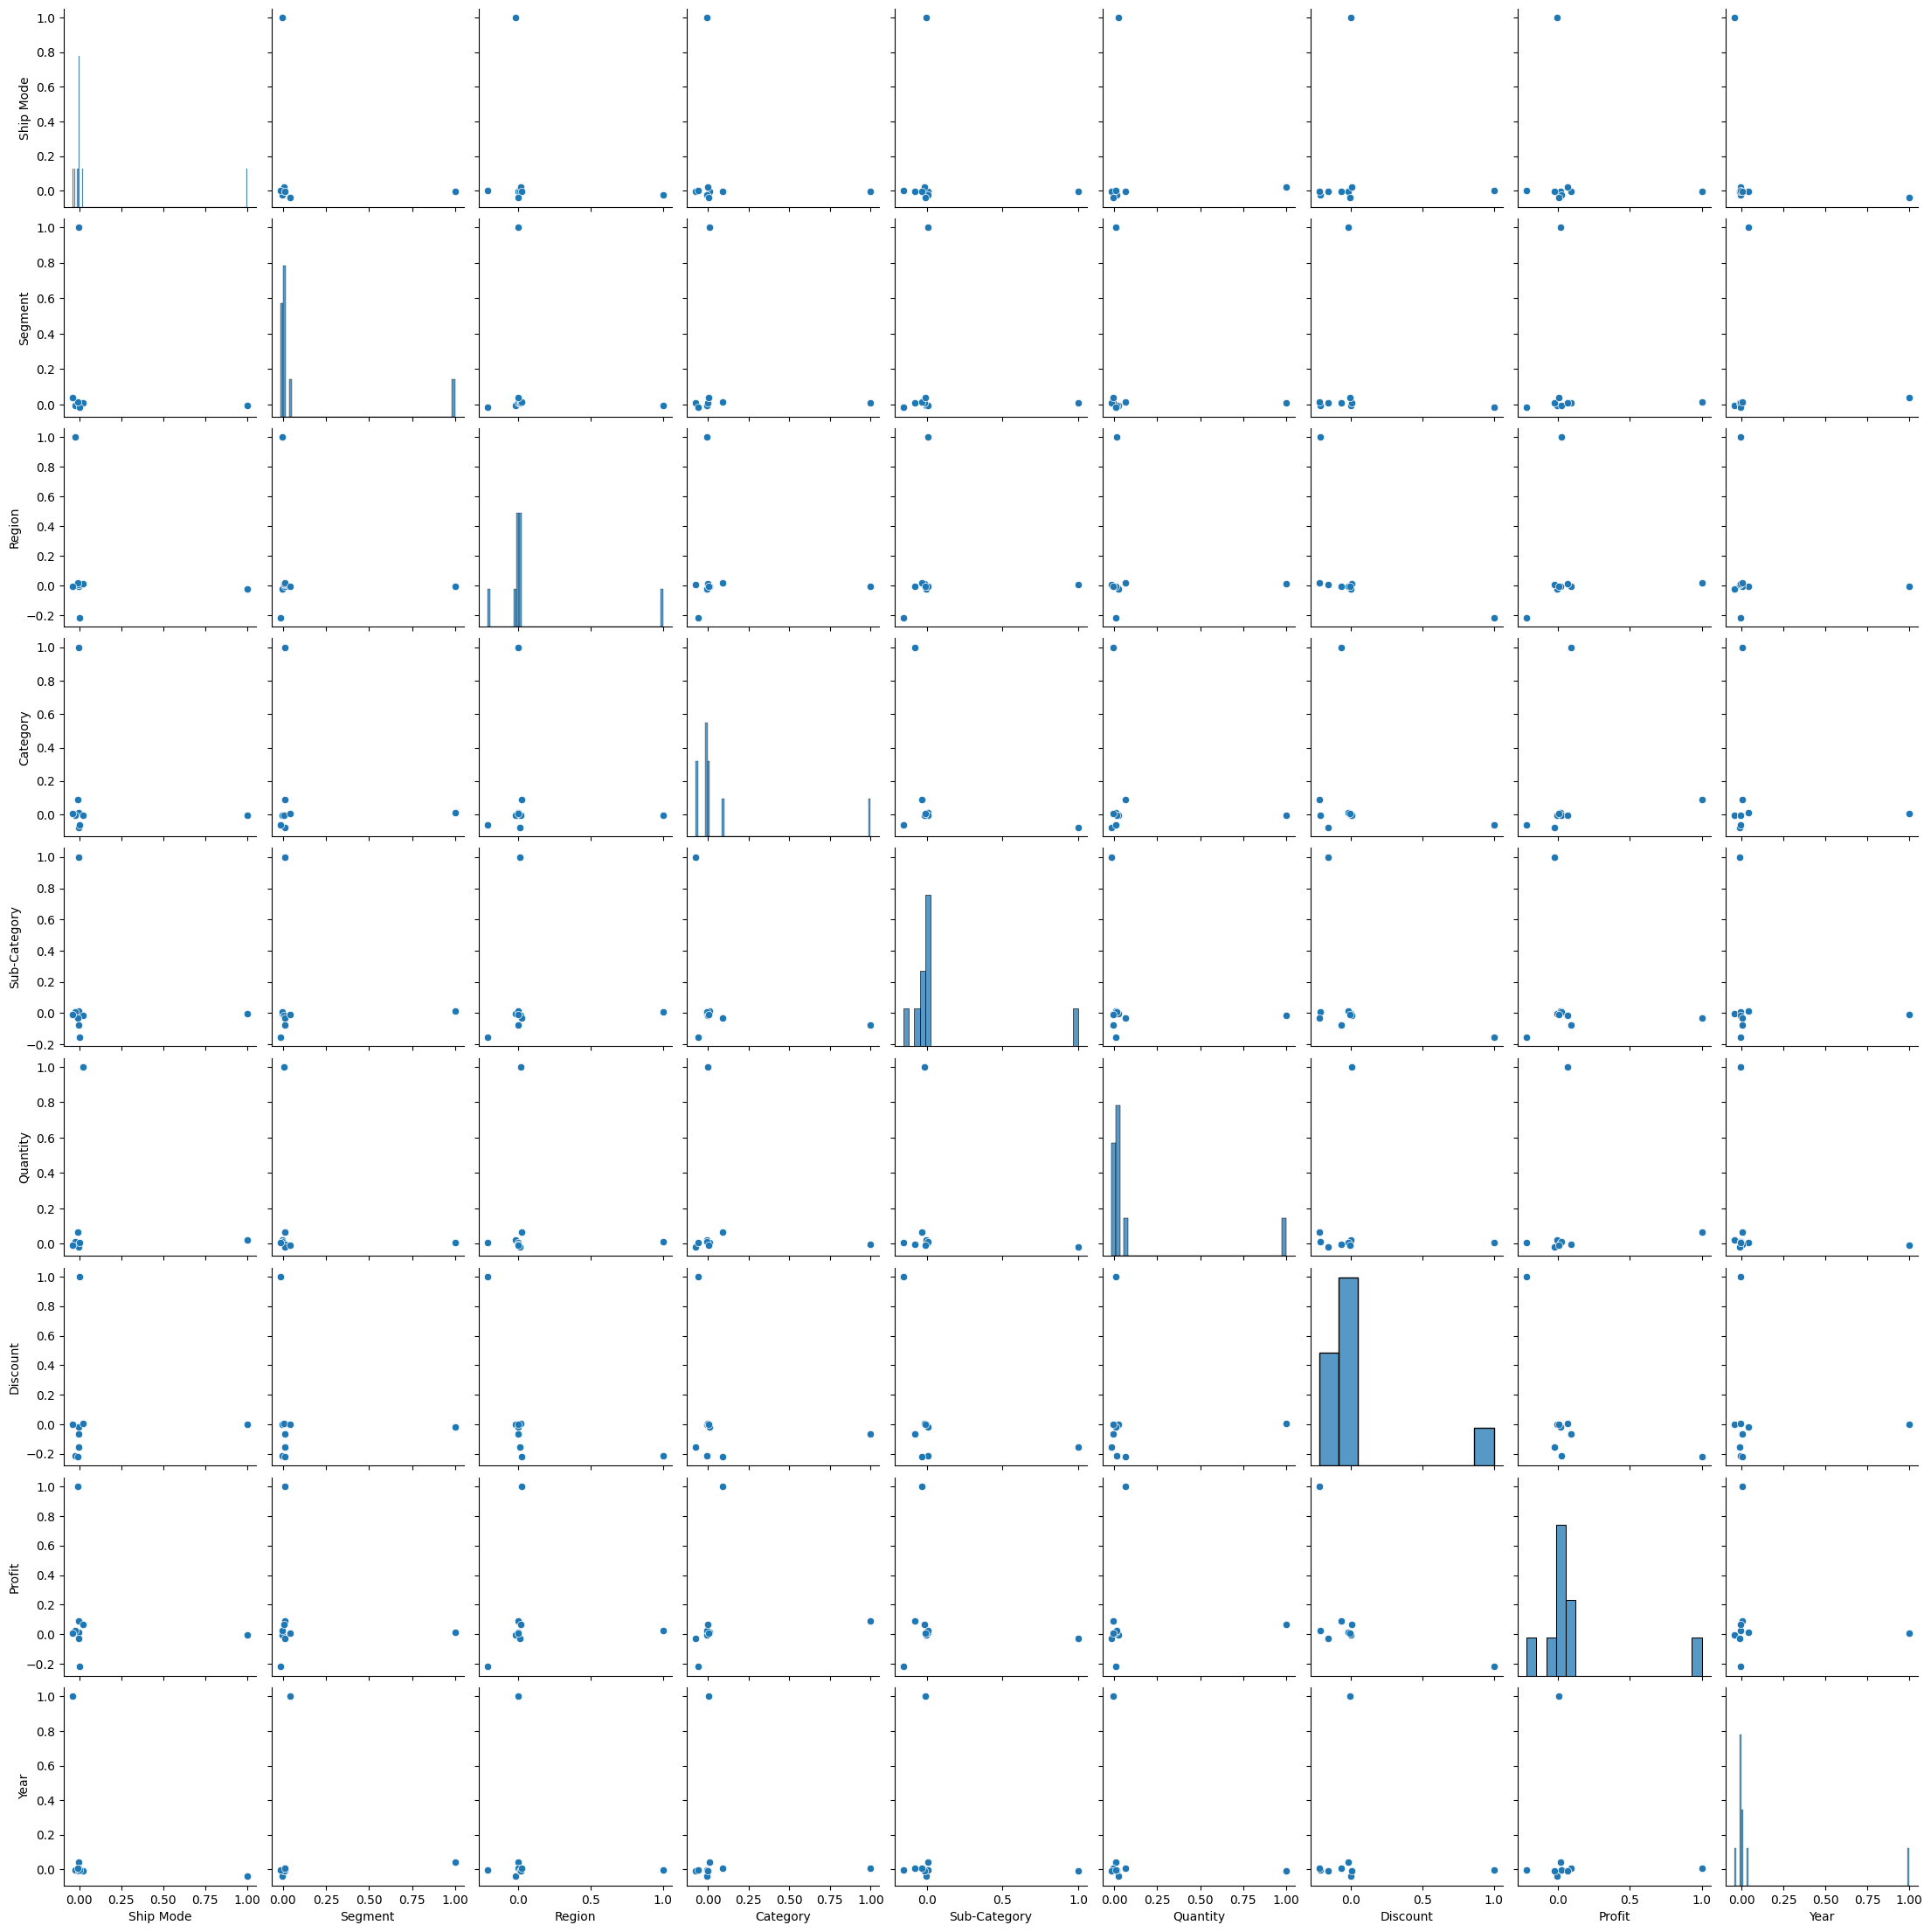

In [441]:
#построить после того как преобразую категориальные признаки
sns.pairplot(corr)
plt.show()

In [442]:
X = df_filtered.drop('Profit', axis=1)
y = df_filtered['Profit']

In [443]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [105]:
display(X, y)

NameError: name 'X' is not defined

In [445]:
model = LinearRegression()#сделать масштабирование отдельных столбцов -sales, год, и посмотреть потом на коэфф-ты не выбивается ли какой то из них
model.fit(X, y)

LinearRegression()

In [446]:
np.set_printoptions(precision=2, suppress=True)

In [448]:
model.coef_, model.intercept_

(array([  -1.84,    2.62,   -5.41,   27.02,   -2.69,    7.16, -260.95,
          -0.1 ,    0.59]),
 np.float64(-1138.9255364846717))

In [449]:
model.predict(X[:1])

array([36.22])

In [88]:
df3 = pd.DataFrame(X)
df3['y'] = y
df3['pred_fit'] = model.predict(X)
df3['pred_dot'] = X.dot(model.coef_) + model.intercept_

df3.head()

NameError: name 'X' is not defined

In [451]:
df3['residual'] = df3['pred_fit'] - df3['y']
df3.head()#Посчитаем отклонения предсказаний от истины.

,Ship Mode,Segment,Region,Category,Sub-Category,Quantity,Discount,Month,Year,y,pred_fit,pred_dot,residual
0,2,0,2,0,4,2,0.00,11,2016,41.91,36.22,36.22,-5.69
1,2,0,2,0,5,3,0.00,11,2016,219.58,40.69,40.69,-178.89
2,2,1,3,1,10,2,0.00,6,2016,6.87,44.79,44.79,37.92
3,3,0,2,0,16,5,0.45,10,2015,-383.03,-94.32,-94.32,288.71
4,3,0,2,1,14,2,0.20,10,2015,2.52,-18.17,-18.17,-20.69


In [452]:
np.mean(df3['residual'] ** 2)

np.float64(51419.319366869284)